#Importing Libraries and Data

In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
#Mounting drive to import data from the drive
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [ ]:
df=pd.read_csv('/content/mount/MyDrive/DS/ML Datasets/diabetes.csv')

#Understanding The Data

In [ ]:
#Dropping Null Values 
df.dropna()

#Outcome = 1 means the person has diabetes and 0 means not diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: ylabel='Outcome'>

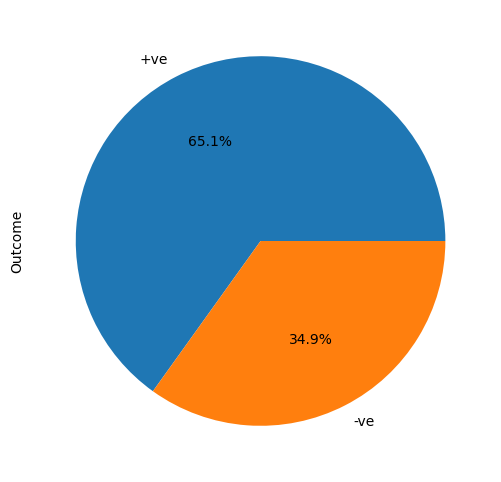

In [ ]:
#Percentage of diabetes +ve and diabetes -ve
df['Outcome'].value_counts().plot.pie(figsize=(6,6),labels=['+ve','-ve'],autopct='%1.1f%%')

In [ ]:
#making new feature which indicates True if bmi its greater than 25 or false
df['oweight']=df['BMI'].apply(lambda x: x>25)
df['oweight']

0       True
1       True
2      False
3       True
4       True
       ...  
763     True
764     True
765     True
766     True
767     True
Name: oweight, Length: 768, dtype: bool

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,oweight
0,6,148,72,35,0,33.6,0.627,50,1,True
1,1,85,66,29,0,26.6,0.351,31,0,True
2,8,183,64,0,0,23.3,0.672,32,1,False
3,1,89,66,23,94,28.1,0.167,21,0,True
4,0,137,40,35,168,43.1,2.288,33,1,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True
764,2,122,70,27,0,36.8,0.340,27,0,True
765,5,121,72,23,112,26.2,0.245,30,0,True
766,1,126,60,0,0,30.1,0.349,47,1,True


<Axes: >

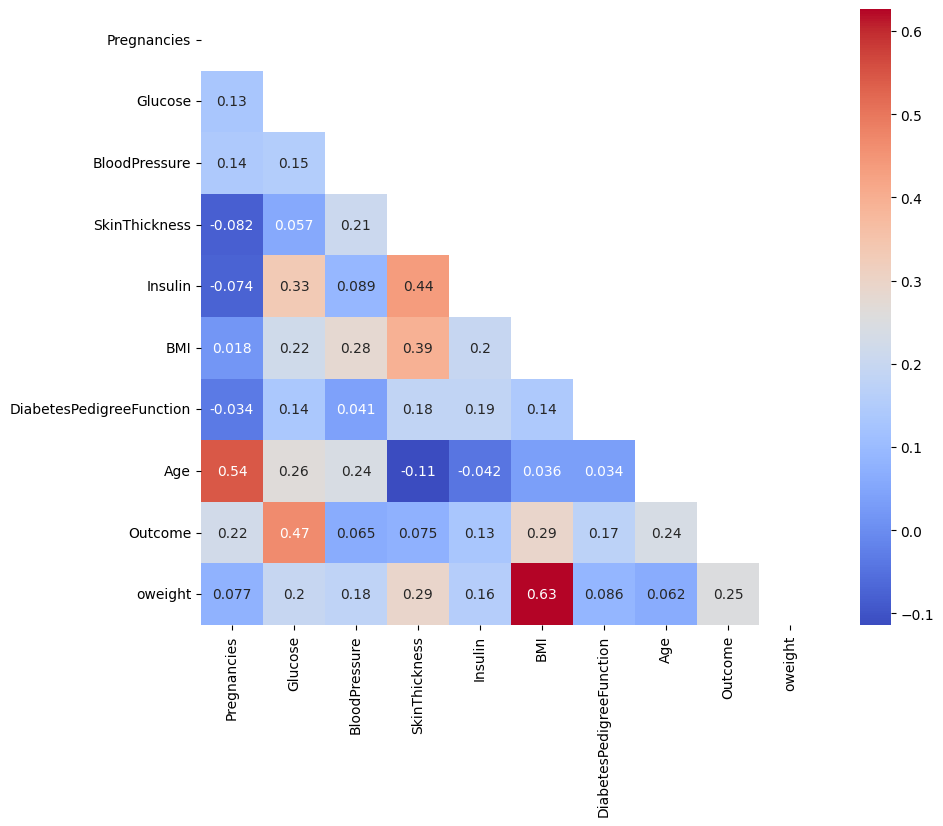

In [ ]:
#heatmap shows that glucose and outcome are positively correlated 
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
fig ,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm',mask=mask,annot=True)

#Using AutoMl Pycaret

In [ ]:
!pip install pycaret
from pycaret.classification import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:0

In [ ]:
#removing last 150 records for the test
test=df.tail(150)
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,oweight
618,9,112,82,24,0,28.2,1.282,50,1,True
619,0,119,0,0,0,32.4,0.141,24,1,True
620,2,112,86,42,160,38.4,0.246,28,0,True
621,2,92,76,20,0,24.2,1.698,28,0,False
622,6,183,94,0,0,40.8,1.461,45,0,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True
764,2,122,70,27,0,36.8,0.340,27,0,True
765,5,121,72,23,112,26.2,0.245,30,0,True
766,1,126,60,0,0,30.1,0.349,47,1,True


In [ ]:
#considering the whole dataframe except last 150 records
train=df.drop(test.index)
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,oweight
0,6,148,72,35,0,33.6,0.627,50,1,True
1,1,85,66,29,0,26.6,0.351,31,0,True
2,8,183,64,0,0,23.3,0.672,32,1,False
3,1,89,66,23,94,28.1,0.167,21,0,True
4,0,137,40,35,168,43.1,2.288,33,1,True
...,...,...,...,...,...,...,...,...,...,...
613,6,105,80,28,0,32.5,0.878,26,0,True
614,11,138,74,26,144,36.1,0.557,50,1,True
615,3,106,72,0,0,25.8,0.207,27,0,True
616,6,117,96,0,0,28.7,0.157,30,0,True


In [ ]:
#intiating the automl library pycaret 
setup(data=train,train_size=0.20,target='Outcome',fix_imbalance=True,normalize=True,transformation=True,session_id=42)

,Description,Value
0,Session id,42
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(618, 10)"
4,Transformed data shape,"(655, 10)"
5,Transformed train set shape,"(160, 10)"
6,Transformed test set shape,"(495, 10)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#comparing multiple modes and sorting by the descending order of recall
#We want the recall high because we don't False Negative  (patients which are predicted non-diabetic by the model but in actual they are diabetic)
#We want high recall value to reduce the FN predictions so the patients are given the appropriate treatment
compare_models(sort='Recall',n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7321,0.8834,0.8850,0.5839,0.6937,0.4753,0.5210,0.2930
qda,Quadratic Discriminant Analysis,0.7712,0.8722,0.8300,0.6752,0.7225,0.5411,0.5729,0.3040
knn,K Neighbors Classifier,0.7968,0.8534,0.8150,0.6955,0.7388,0.5778,0.5961,0.2420
ridge,Ridge Classifier,0.8224,0.0000,0.7650,0.7792,0.7418,0.6087,0.6375,0.1350
lda,Linear Discriminant Analysis,0.8147,0.8944,0.7650,0.7722,0.7363,0.5960,0.6277,0.1680
ada,Ada Boost Classifier,0.7897,0.8606,0.7400,0.6825,0.6968,0.5372,0.5513,0.5010
dt,Decision Tree Classifier,0.7186,0.7112,0.6850,0.6005,0.6264,0.4041,0.4212,0.2170
svm,SVM - Linear Kernel,0.7359,0.0000,0.6800,0.5933,0.6088,0.4196,0.4413,0.1320
rf,Random Forest Classifier,0.7987,0.8931,0.6750,0.7655,0.6844,0.5422,0.5661,0.5170
gbc,Gradient Boosting Classifier,0.7583,0.8575,0.6750,0.6800,0.6387,0.4624,0.4885,0.3710


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

[GaussianNB(priors=None, var_smoothing=1e-09),
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform')]

In [ ]:
#since the qda model has the highest F1 Score (harmonic mean of recall and precision)
#precision affects  False Positive (Patients which are classified as Diabetic by the model but are non-diabetic in actual) 
#we want high precision value to reduce the FP predictions so the patients are not given unecessary treatments
qda=create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7692,0.8000,1.0000,0.6250,0.7692,0.5618,0.6250
1,0.7692,1.0000,1.0000,0.6250,0.7692,0.5618,0.6250
2,0.7692,0.8250,0.8000,0.6667,0.7273,0.5301,0.5367
3,0.7500,0.8750,1.0000,0.5714,0.7273,0.5263,0.5976
4,0.8333,0.9375,0.7500,0.7500,0.7500,0.6250,0.6250
5,0.7500,0.8750,1.0000,0.5714,0.7273,0.5263,0.5976
6,0.9167,1.0000,0.7500,1.0000,0.8571,0.8000,0.8165
7,0.7500,0.9375,0.7500,0.6000,0.6667,0.4706,0.4781
8,0.5000,0.6406,0.7500,0.3750,0.5000,0.1000,0.1250


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#optimizing recall reduces precision and optimizing precision reduces recall 
#the balance/trade-off of both is important 
# so do trial and error optimizing other parameters until the desired metrics are obtained from the tuned model
tuned_qda=tune_model(qda,n_iter=50,optimize='Accuracy',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7692,0.8500,1.0000,0.6250,0.7692,0.5618,0.6250
1,0.7692,0.9250,1.0000,0.6250,0.7692,0.5618,0.6250
2,0.8462,0.8500,0.8000,0.8000,0.8000,0.6750,0.6750
3,0.8333,0.8125,1.0000,0.6667,0.8000,0.6667,0.7071
4,0.7500,0.9375,0.5000,0.6667,0.5714,0.4000,0.4082
5,0.7500,0.9062,1.0000,0.5714,0.7273,0.5263,0.5976
6,0.8333,0.9688,1.0000,0.6667,0.8000,0.6667,0.7071
7,0.8333,1.0000,1.0000,0.6667,0.8000,0.6667,0.7071
8,0.7500,0.6875,0.7500,0.6000,0.6667,0.4706,0.4781


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


#Confusion Matrix (Train Data)

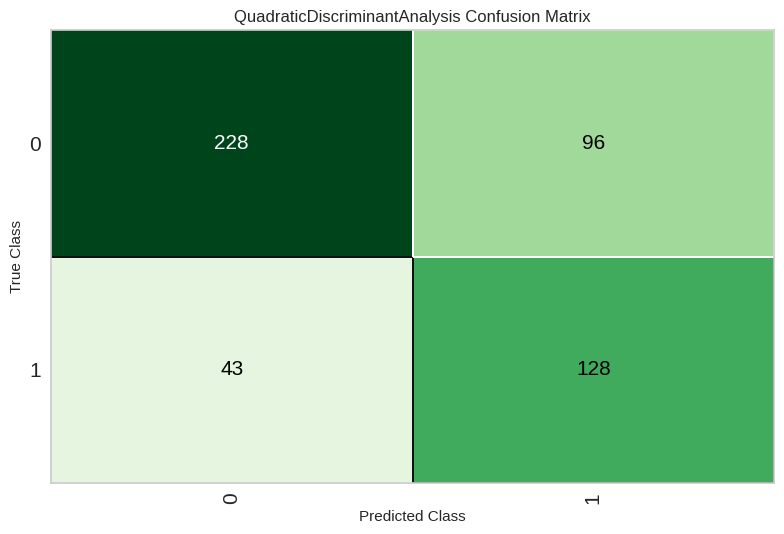

In [ ]:
#confusion matrix of trained model
plot_model(tuned_qda,plot='confusion_matrix')

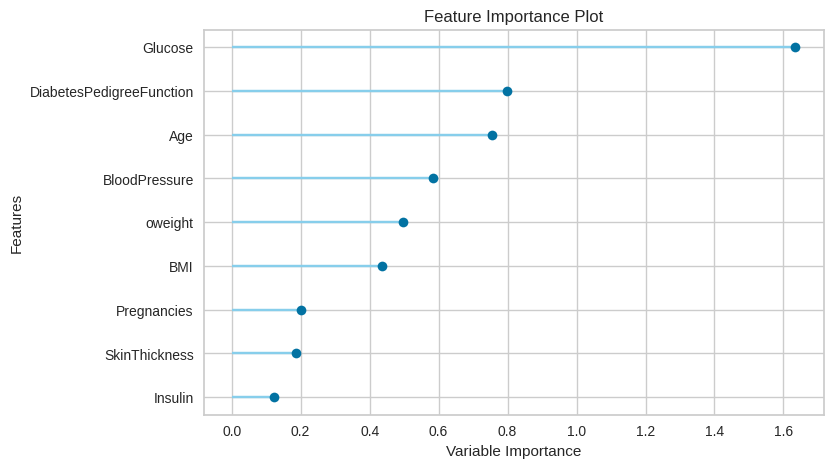

In [ ]:
#we can see that the Glucose is positively correlated to the Outcome of tuned model (as we saw earlier in the heatmap)
plot_model(tuned_lda,plot='feature')

#Test Data Prediction

In [ ]:
#predicting model on the test data
predictions = predict_model(tuned_qda,data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.7533,0.7944,0.7407,0.6349,0.6838,0.4835,0.4874


In [ ]:
predictions

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,oweight,Outcome,prediction_label,prediction_score
618,9,112,82,24,0,28.200001,1.282,50,True,1,1,0.9053
619,0,119,0,0,0,32.400002,0.141,24,True,1,1,0.7459
620,2,112,86,42,160,38.400002,0.246,28,True,0,0,0.8392
621,2,92,76,20,0,24.200001,1.698,28,False,0,0,1.0000
622,6,183,94,0,0,40.799999,1.461,45,True,0,1,0.9898
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900002,0.171,63,True,0,0,0.7437
764,2,122,70,27,0,36.799999,0.340,27,True,0,1,0.7419
765,5,121,72,23,112,26.200001,0.245,30,True,0,0,0.5524
766,1,126,60,0,0,30.100000,0.349,47,True,1,1,0.5464


#Confusion Matrix (Test Set)

In [ ]:
y_test = predictions.Outcome

In [ ]:
y_test.value_counts()

0    96
1    54
Name: Outcome, dtype: int64

In [ ]:
pred = predictions.prediction_label	

Text(70.72222222222221, 0.5, 'True Class')

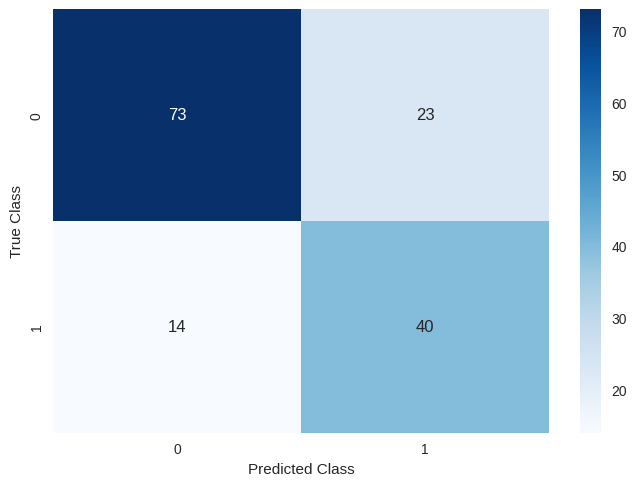

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
ax=plt.subplot()
sns.heatmap(cm,ax=ax,fmt='g',annot=True,cmap='Blues')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')